# Mario

# Setup Mario Environment

In [33]:
# Import the joypad wrappers
from nes_py.wrappers import JoypadSpace
# Import the game
import gym_super_mario_bros
# Import the simplified controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [34]:
# Simplfy the movement of Mario using SIMPLE_Movement
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [35]:
# Setup the environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT) # Limit the action-space from 256 to the 7 basic actions by wrapping the environment in a JoypadSpace wrapper

In [36]:
# To see what the environment looks like
env.observation_space.shape  # 240 pixels by 256 pixels in 3 colors channels, which represents the frame of the game

(240, 256, 3)

In [37]:
# Randomly test the environment
done = True 
# Loop through 100000 steps (each frame in the game)
for step in range(100):
    if done:
        env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game
    env.render()
# close the environment
env.close()


# Preprocessing Environment

In [38]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, SubprocVecEnv, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [39]:
# Create the base environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
# Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT) # Limit the action-space from 256 to the 7 basic actions by wrapping the environment in a JoypadSpace wrapper

In [40]:

# Gray-scale and down-sample in order to reduce the computation time for the Reinforcement Learning model
env = GrayScaleObservation(env, keep_dim=True) # Color channels will become 1

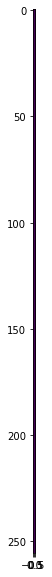

In [41]:
state = env.reset()

plt.figure(figsize=(15,10))
plt.imshow(state[0])

In [42]:
state = env.reset()
state.shape

(240, 256, 1)

So we jump from 240*256*3 = 184320 bits to 240*256*1 = 61440 bits!

In [43]:
# warp inside the Dummy Enivornment

env = DummyVecEnv([lambda: env])


In [44]:

# Stack frames this will give the agent some kind of memory
env = VecFrameStack(env, n_stack=4, channels_order= 'last') # Stack 4 consecutive frames together to give the agent a sense of motion

In [45]:
state = env.reset()

In [46]:
state, reward, done, info = env.step([env.action_space.sample()])

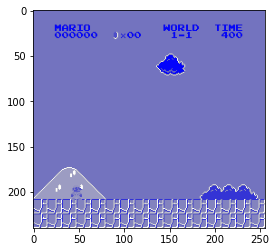

In [47]:
plt.imshow(state[0])

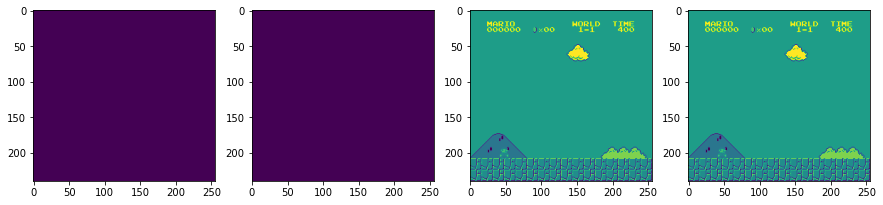

In [48]:
# Note run state, reward, done, info = env.step([env.action_space.sample()])
# Four times to get the visulaization of four steps in the environment
plt.figure(figsize=(15,10))
for idx in  range(state.shape[3]):
    plt.subplot(1, 4, idx+1)
    plt.imshow(state[0][:, :, idx])
plt.show()

## Training The Model

In [49]:
# Import os for file path management
import os
# Import PPO Reinforcement algorithm
from stable_baselines3 import PPO
# Import Base Callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [50]:
# Setup Directory for saving tensorboard logs
LOG_DIR = './logs/'

In [53]:
# Setup the PPO Reinforcement Learning model
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, device="cuda", learning_rate=0.000001, n_steps=512) 

Using cpu device
Wrapping the env in a VecTransposeImage.


In [54]:
# Train the model
model.learn(total_timesteps=1000000)

Logging to ./logs/PPO_2


c:\Users\smyra\anaconda3\lib\site-packages\gym_super_mario_bros\smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 56  |
|    iterations      | 1   |
|    time_elapsed    | 9   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 7             |
|    iterations           | 2             |
|    time_elapsed         | 142           |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 5.1593408e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.00682      |
|    learning_rate        | 1e-06         |
|    loss                 | 191           |
|    n_updates            | 10            |
|    policy_gradient_loss | -5.9e-05      |
|    value_loss           | 510           |
-------------------------------------------
-----

KeyboardInterrupt: 

In [ ]:
#model.save('thisisatestmodel')

# Model Testing

In [ ]:
# Load model
#model = PPO.load('./train/best_model')

In [ ]:
#state = env.reset()

In [ ]:
# # Start the game 
# state = env.reset()
# # Loop through the game
# while True: 
#     action, _ = model.predict(state)
#     state, reward, done, info = env.step(action)
#     env.render()

# 